In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pylab #Imports matplotlib and a host of other useful modules
import pickle
import time

import sys
# sys.path.append("./")
import motion_planner as mp
from motion_planner import StateP

In [3]:
import logging
reload(logging)
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.INFO, datefmt='%I:%M:%S')
logging.info('Logging enabled in notebook')


04:31:54 INFO:Logging enabled in notebook


# Manual and visual means of sanity checking results
- by printing out data in tables that are suitable for inspection
- by visualizing low level path data

In [4]:
mp = reload(mp)

# List home directory

In [4]:
ls '.'

arcs.ipynb                     ne_sample_traj.pickle
evaluate.ipynb                 ne_sample_unreachables.pickle
field_drawings.ipynb           ne_stage1.pickle
load_mp.py                     ne_stage2.pickle
mem_profiling.py               ne_stage3.pickle
motion_planner.py              ne_stage4.pickle
motion_planner.pyc             ne_unreachables.pickle
mp_deprecated.ipynb            oldcode/
n_remaining.pickle             readme.md
n_sample.pickle                requirements.txt
n_sample_stage2.pickle         results.txt
n_sample_stage4.pickle         runs/
n_sample_traj.pickle           sample.pickle
n_sample_unreachables.pickle   sample_stage2.pickle
n_stage1.pickle                sample_stage4.pickle
n_stage2.pickle                sample_traj.pickle
n_stage3.pickle                sample_trajectories.ipynb
n_stage4.pickle                spacefilling_circles.ipynb
n_unreachables.pickle          stage1.pickle
ne_remaining.pickle            stage2.pickle
ne_sample.pickle           

In [27]:
mp=reload(mp)
print "NORTH"
print mp.N_XY_GOALS
print mp.N_GOAL_HEADINGS
print
print "NORTHEAST"
print mp.NE_XY_GOALS
print mp.NE_GOAL_HEADINGS

NORTH
[(0, 20), (1, 20), (-1, 20)]
[0, 354, 6, 350, 10, 346, 14]

NORTHEAST
[(46, -8), (45, -7), (46, -9)]
[300, 294, 306, 290, 310, 286, 314]


In [80]:
#
#   Load stages
#

# start = time.time()
# filepath = '/temp/valkyrierobotics/mp_stages/stage1.pickle'
# config = mp.load_config(filepath)
# config = mp.load_config(mp.N_STAGE1_FILEPATH)
# print "Num stage1 stages: ",len(config)

# config2 = mp.load_config(mp.N_STAGE2_FILEPATH)
# print "Num stage2 states: ",len(config2)

# print "elapsed: %d sec" % (time.time()-start)


11:44:26 INFO:Loading config file from stage1.pickle
11:44:26 INFO:Loading config file from stage2.pickle


 Num stage1 stages:  2195
Num stage2 states:  32494
elapsed: 0 sec


# Sanity checks 

In [170]:
mp.sanity_check_stage("north", stage=1, max=10)


04:52:53 INFO:Loading n_stage1.pickle
04:52:53 INFO:Loading pickle file : n_stage1.pickle
04:52:54 INFO:Loaded n_stage1.pickle : 110930 rows  (0.0 min)
04:52:54 INFO:Calulating trajectories for 110930 states


Calculated 10 trajectories. (0.0 min) 
state : next(planned) next(simulated)  target (goal)            move          dist             r
(54, 78, 276)  : 
	    (1, 20, 0)     (1, 19, 0)     (1, 20, 0)             lh          85.97           59.0
(125, 59, 214)  : 
	    (0, 20, 0)  (-1, 23, 358)     (0, 20, 0)             lh         172.44           69.0
(13, 47, 316)  : 
	  (0, 20, 354)   (0, 20, 354)   (0, 20, 354)             lh          30.07           46.0
(57, 113, 304)  : 
	  (0, 20, 354)   (0, 20, 354)   (0, 20, 354)             lh         111.98          130.0
(22, 70, 310)  : 
	   (-1, 20, 0)    (-1, 20, 0)    (-1, 20, 0)             lh          56.77           66.0
(6, 48, 340)  : 
	    (1, 20, 0)     (0, 20, 0)     (1, 20, 0)             lh          28.57           84.5
(59, 43, 216)  : 
	    (0, 20, 6)     (0, 21, 4)     (0, 20, 6)             lh          84.81           33.0
(62, 57, 250)  : 
	  (1, 20, 354)   (1, 19, 354)   (1, 20, 354)             lh          81.99       

In [171]:
mp.sanity_check_stage("northeast", stage=1, max=10)


04:52:58 INFO:Loading ne_stage1.pickle
04:52:58 INFO:Loading pickle file : ne_stage1.pickle
04:52:59 INFO:Loaded ne_stage1.pickle : 60594 rows  (0.0 min)
04:52:59 INFO:Calulating trajectories for 60594 states


Calculated 10 trajectories. (0.0 min) 
state : next(planned) next(simulated)  target (goal)            move          dist             r
(57, 101, 54)  : 
	 (46, -8, 294)  (46, -8, 294)  (46, -8, 294)             rh         132.13           63.5
(6, 72, 112)  : 
	 (45, -7, 300)  (50, -4, 308)  (45, -7, 300)             rh         127.14           44.5
(70, 105, 42)  : 
	 (46, -8, 294)  (47, -8, 296)  (46, -8, 294)             rh         134.06           72.0
(96, 5, 266)  : 
	 (45, -7, 300)  (44, -6, 300)  (45, -7, 300)             lh          53.12           92.0
(107, -2, 252)  : 
	 (46, -8, 300)  (46, -8, 300)  (46, -8, 300)             lh          63.14           75.0
(73, -6, 248)  : 
	 (46, -8, 300)  (45, -7, 298)  (46, -8, 300)             lh          27.98           31.5
(97, -5, 250)  : 
	 (46, -9, 300)  (46, -9, 300)  (46, -9, 300)             lh          52.84           60.0
(88, -26, 198)  : 
	 (46, -9, 300)  (45, -9, 298)  (46, -9, 300)             lh          51.66        

#  Path testing

In [28]:
# Load stage1 configuration file
config = mp.load_config(mp.N_STAGE1_FILEPATH)
print len(config)
# Load stage2 configuration file
# config2 = mp.load_config(mp.NE_STAGE2_FILEPATH)
config2 = mp.load_config('n_sample.pickle')
# config2 = mp.load_config('runs/Mar6/n_sample.pickle')
print len(config2)
#del config2

03:35:05 INFO:Loading pickle file : n_stage1.pickle
03:35:07 INFO:Loading pickle file : n_sample.pickle


110930
16601


In [29]:
#   Sample
max=11
ii=0
for k,v in config.iteritems():
    if ii>max:
        break
    mp.print_state(k,v)
    ii+=1


  (54, 78, 276) : g1:     (1, 20, 0)  r:  59.0  type: lh  d: 86.0   g2:           None  d2:  None  samples: 5
 (125, 59, 214) : g1:     (0, 20, 0)  r:  69.0  type: lh  d:172.4   g2:           None  d2:  None  samples: 6
  (13, 47, 316) : g1:   (0, 20, 354)  r:  46.0  type: lh  d: 30.1   g2:           None  d2:  None  samples: 12
 (57, 113, 304) : g1:   (0, 20, 354)  r: 130.0  type: lh  d:112.0   g2:           None  d2:  None  samples: 13
   (6, 48, 340) : g1:     (1, 20, 0)  r:  84.5  type: lh  d: 28.6   g2:           None  d2:  None  samples: 77
  (22, 70, 310) : g1:    (-1, 20, 0)  r:  66.0  type: lh  d: 56.8   g2:           None  d2:  None  samples: 8
  (59, 43, 216) : g1:     (0, 20, 6)  r:  33.0  type: lh  d: 84.8   g2:           None  d2:  None  samples: 4
  (62, 57, 250) : g1:   (1, 20, 354)  r:  45.5  type: lh  d: 82.0   g2:           None  d2:  None  samples: 3
  (52, 64, 260) : g1:     (0, 20, 0)  r:  45.0  type: lh  d: 77.3   g2:           None  d2:  None  samples: 8
   (-1,

In [30]:
mp.NE_LOWER_YLIMIT,mp.UPPER_YLIMIT

(-72, 144)

Radius:  50
Number of cells having r=50: 1062
Plotted 26/1062 


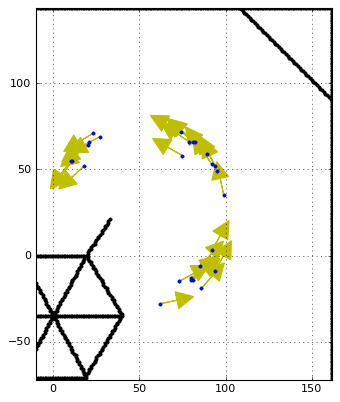

In [48]:
# Display sample of cells having specified turning radius
r = 50
print "Radius: ", r
cc = dict([(k,v) for k,v in config.items() if v.r() == r])
print "Number of cells having r=%d: %d" % (r, len(cc))
mp.flow_plot_config(cc,xlim=(mp.LOWER_XLIMIT-5,mp.UPPER_XLIMIT),ylim=(-72,mp.UPPER_YLIMIT), max=25)


Radius:  50
State:
  (94, 51, 208) : g1:    (1, 20, 10)  r:  50.0  type: lh  d:137.2   g2:           None  d2:  None  samples: 3
None

Location p((94, 51)) with heading 208 deg (3.6 rad) on radius 50 
radius:50, heading : 3.6 radians, 208 degrees,  dist: 137.2
Center of turning radius = (49.9, 27.5)
Plotted: 1000 


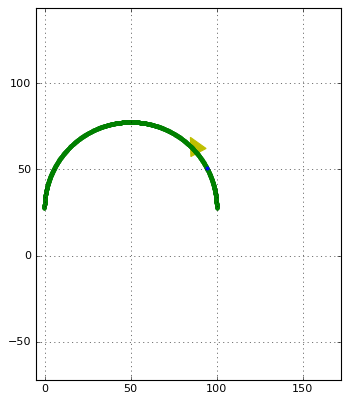

In [62]:
# Prints a single state (x,y,h) along with an arc indicating its intended path.
# Works best for stage1 or stage2 state.
r = 50
print "Radius: ", r
ss = [(k,v) for k,v in config.items() if v.r() == r][10]
print "State:"
print mp.print_state(ss[0],ss[1])
print
mp.flow_plot_state(ss,xlim=(mp.LOWER_XLIMIT,mp.UPPER_XLIMIT+10),ylim=(-72,mp.UPPER_YLIMIT),
                   stage2=mp.is_stage2(ss[1]),turntype=ss[1].type())

In [63]:
key = (94, 51,208)
print "State: "
mp.print_state(key, config[key])

State: 
  (94, 51, 208) : g1:    (1, 20, 10)  r:  50.0  type: lh  d:137.2   g2:           None  d2:  None  samples: 3




#     Visual pathing sanity checks




In [64]:
##=== Creates goal1s ===

# Selects a small sample of 2nd stage states falling within a distance range, and their goal stage
d_min = 50
d_max = 55
c_filtered = dict([(k,v) for k,v in config2.iteritems() if v.goal2() and v.r() and d_min <= v.dist() <= d_max])
print "Number of cells having %d <= dist <= %d : %d " % (d_min,d_max,len(c_filtered))
ii=0
max=20
for k,v in c_filtered.items():
    print k,v
    ii+=1
    if ii>max:
        break
goal1s = list(set([v.goal1() for v in c_filtered.itervalues() if v.goal1()]))
len(goal1s)

Number of cells having 50 <= dist <= 55 : 71 
(15, 66, 276) StateP(goal1=(2, 54, 350),dist=53.01,type=lh,r=15.0,goal2=(0, 20, 0),dist2=18.92,rot=None,samples=1
(8, 70, 28) StateP(goal1=(9, 58, 340),dist=51.29,type=rh,r=15.0,goal2=(0, 20, 354),dist2=12.39,rot=None,samples=4
(33, 57, 318) StateP(goal1=(27, 53, 290),dist=51.44,type=rh,r=15.0,goal2=(1, 20, 354),dist2=7.28,rot=None,samples=3
(34, 55, 276) StateP(goal1=(32, 55, 284),dist=51.66,type=lh,r=15.0,goal2=(1, 20, 354),dist2=2.0,rot=None,samples=1
(24, 54, 244) StateP(goal1=(3, 43, 354),dist=50.41,type=lh,r=15.0,goal2=(1, 20, 354),dist2=27.33,rot=None,samples=3
(39, 46, 298) StateP(goal1=(31, 44, 266),dist=50.68,type=rh,r=15.0,goal2=(1, 20, 354),dist2=8.35,rot=None,samples=2
(31, 57, 292) StateP(goal1=(29, 56, 284),dist=51.25,type=rh,r=15.0,goal2=(0, 20, 0),dist2=2.23,rot=None,samples=3
(15, 66, 32) StateP(goal1=(14, 48, 316),dist=50.74,type=rh,r=15.0,goal2=(1, 20, 354),dist2=19.32,rot=None,samples=2
(15, 72, 344) StateP(goal1=(15, 7

71

Plotted 11/71 


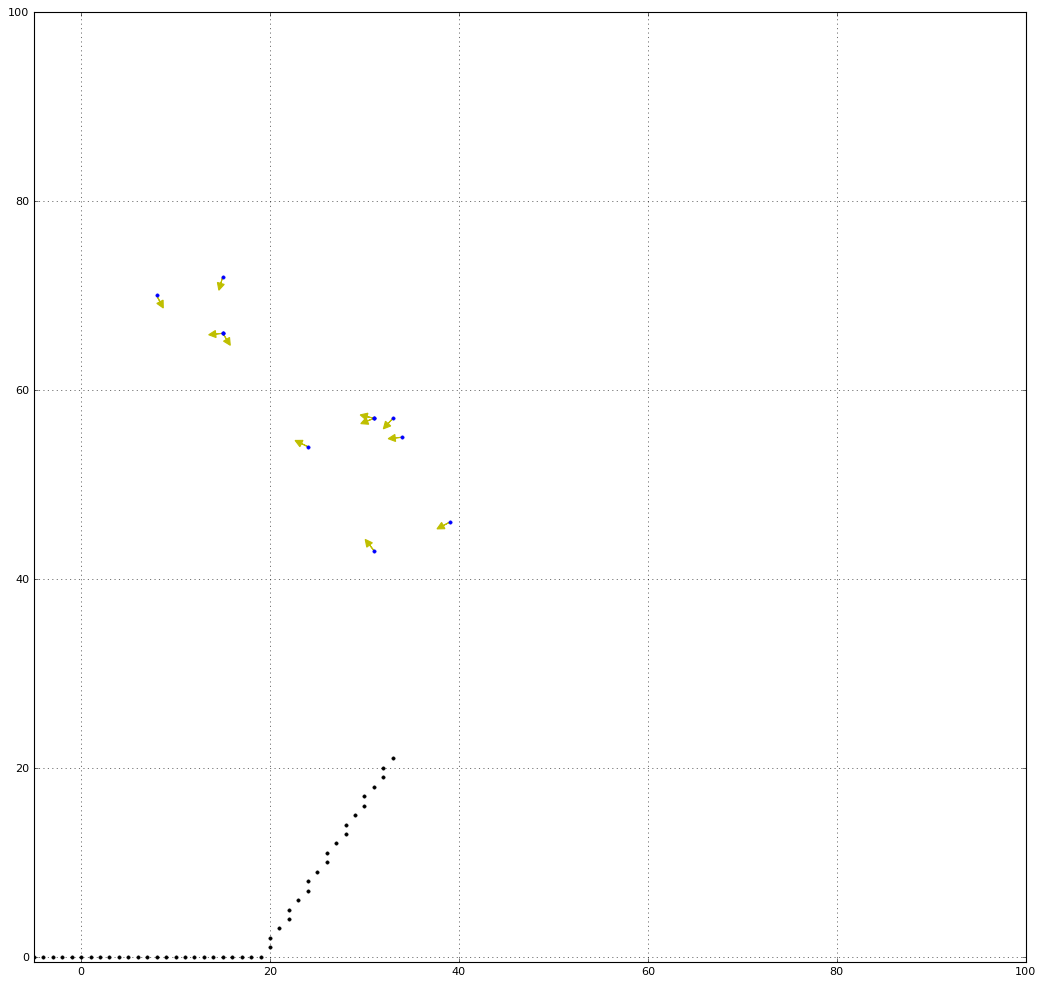

In [65]:
mp.flow_plot_config(c_filtered,xlim=(-5,100),ylim=(-0.5,100),arrowsize=0.75, arrowlength=0.75, max=10, figsize=16)

71
Location p((8, 70)) with heading 28 deg (0.5 rad) on radius 15 
radius:15, heading : 0.5 radians, 28 degrees,  dist: 51.3
Center of turning radius = (-5.2, 63.0)
Plotted: 188 


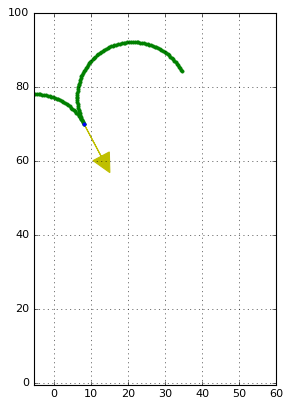

In [66]:
#   Plots a single path from the filtered states
#   Plots the grid location and heading, and a tangent circle on its current turning radius.
#   If stage2=True, tries to explore backwards from the (x,y) of the state.
mp = reload(mp)
print len(c_filtered)
sss = [(k,v) for k,v in c_filtered.iteritems()][1]
mp.flow_plot_state(sss,xlim=(-5.5,60),ylim=(-0.5,100), stage2=True, turntype='rh')


In [67]:
ls runs/

Mar6/                logs/                stage2.Mar2.pickle
backups/             mar5/                stage2.pickle.feb28
feb18/               stage1.Mar2.pickle


In [69]:
##
##  Find high trafficked stage2 goals : requires a rich set of stage2 goals.
##
##  goal2 is primary goal, goal1 is stage2 goal.
mp = reload(mp)
#config2 = mp.load_config(mp.N_STAGE2_FILEPATH)
config2 = mp.load_config('n_sample_stage2.pickle')
print "Count(config2): ", len(config2)
import operator
from collections import defaultdict
goal1_counts = defaultdict(int)
num_stage2=0
for k,v in config2.iteritems():
    if mp.is_stage2(v) :
        num_stage2 += 1
        goal1_counts[v.goal1()]+=1
print "Number of stage2 goals feeding into a stage1: %d/%d" % (len(goal1_counts),num_stage2)
top_goal1s = sorted(goal1_counts.items(), key=operator.itemgetter(1), reverse=True)[:10]
print "Top stage2 goal1 states: "
for gg in top_goal1s[:7]:
    print "%15s : %3s " % (gg[0],gg[1])


03:56:32 INFO:Loading pickle file : n_sample_stage2.pickle


Count(config2):  177120
Number of stage2 goals feeding into a stage1: 910/56643
Top stage2 goal1 states: 
  (72, 56, 240) : 156 
  (78, 58, 240) : 150 
  (84, 35, 206) : 148 
  (83, 43, 218) : 148 
  (80, 53, 232) : 147 
  (78, 50, 230) : 145 
  (60, 75, 272) : 145 



Goal1:  (78, 58, 240)

Number of stage2 paths to this state: 150

(83, 56, 260):StateP(goal1=(78, 58, 240),dist=106.93,type=rh,r=15.0,goal2=(1, 20, 354),dist2=5.41,rot=None,samples=1
(74, 30, 104):StateP(goal1=(78, 58, 240),dist=138.44,type=lh,r=15.0,goal2=(1, 20, 354),dist2=36.92,rot=None,samples=1
(78, 32, 120):StateP(goal1=(78, 58, 240),dist=132.97,type=lh,r=15.0,goal2=(1, 20, 354),dist2=31.45,rot=None,samples=1
(83, 53, 212):StateP(goal1=(78, 58, 240),dist=108.65,type=lh,r=15.0,goal2=(1, 20, 354),dist2=7.13,rot=None,samples=1
(71, 30, 92):StateP(goal1=(78, 58, 240),dist=140.35,type=lh,r=15.0,goal2=(1, 20, 354),dist2=38.83,rot=None,samples=1
Plotted 150/150 


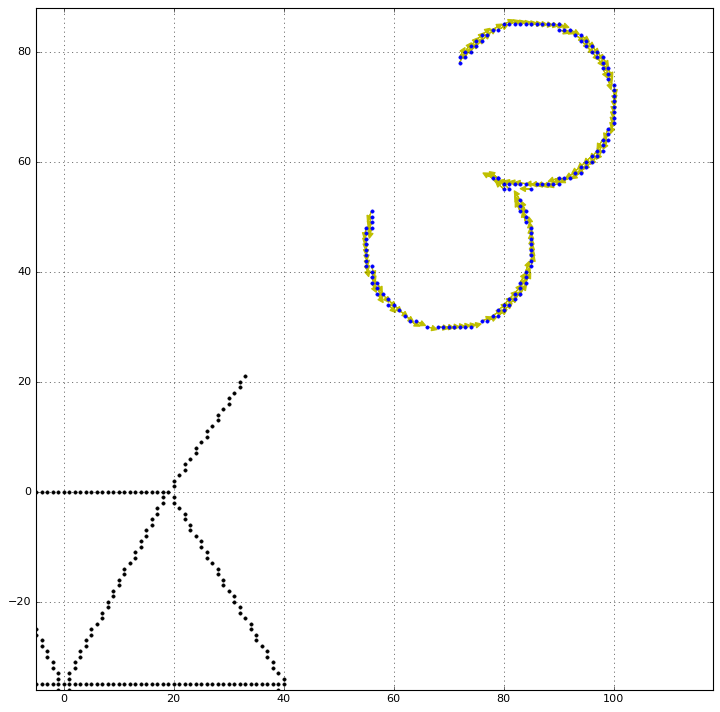

In [73]:
##
##  Plots stage2 fleur-de-lis semicircle paths all feeding into a single Goal1
##
which = 1
goal1 = top_goal1s[which][0]
print
print "Goal1: ", goal1
print
config_matching_goal1 = dict([(k,v) for k,v in config2.iteritems() if v.goal1() and v.goal1() == goal1])
print "Number of stage2 paths to this state: %d" % len(config_matching_goal1)
print
mp.flow_plot_config(config_matching_goal1, xlim=(-5,goal1[0]+40), ylim=(-36,goal1[1]+30), 
                    arrowsize=1, arrowlength=1, max=150,figsize=11,verbose=True, verbosemax=5)


Goal1:  (80, 53, 232)

(80, 53, 232)  :  StateP(goal1=(0, 20, 354),dist=103.43,type=lh,r=49.5,goal2=None,dist2=None,rot=None,samples=7

Number of stage2 paths to this state: 147

Primary goal : (0, 20, 354)
Primary r    : 49.5
Primary type : lh
Points along main tributary:  152
Points in merged set       :  299

(64, 27, 64):StateP(goal1=(80, 53, 232),dist=150.55,type=lh,r=15.0,goal2=(0, 20, 354),dist2=47.12,rot=None,samples=1
(81, 77, 124):StateP(goal1=(80, 53, 232),dist=131.28,type=rh,r=15.0,goal2=(0, 20, 354),dist2=27.85,rot=None,samples=2
(91, -11, 148):StateP(goal1=(0, 20, 354),dist=127.95,type=lh,r=49.5,goal2=None,dist2=None,rot=None,samples=5
(103, 70, 20):StateP(goal1=(80, 53, 232),dist=141.35,type=rh,r=15.0,goal2=(0, 20, 354),dist2=37.92,rot=None,samples=2
(92, 79, 78):StateP(goal1=(80, 53, 232),dist=141.47,type=rh,r=15.0,goal2=(0, 20, 354),dist2=38.04,rot=None,samples=2
Plotted 299/299 


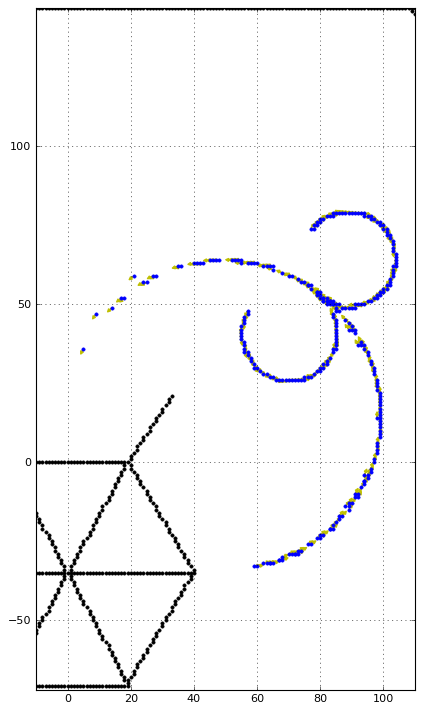

In [74]:
##===========================================
##  A main tributary and two of its feeders
##===========================================
##
##  Plots stage2 fleur-de-lis semicircle paths all feeding into a single goal1
##  AND
##  all paths along same radius and turn radius leading to the same primary goal.
##
which = 4
goal1 = top_goal1s[which][0]
print
print "Goal1: ", goal1
print
print goal1," : ",config2[goal1]
print
config_to_goal1 = dict([(k,v) for k,v in config2.iteritems() if v.goal1() and v.goal1() == goal1])
print "Number of stage2 paths to this state: %d" % len(config_to_goal1)
print

primary_goal = config2[goal1].goal1()
print "Primary goal :", primary_goal
primary_r = config2[goal1].r()
print "Primary r    :", primary_r
primary_type = config2[goal1].type()
print "Primary type :", primary_type

config_to_goal2 = dict([(k,v) for k,v in config2.iteritems() if v.goal1() == primary_goal 
                           and v.r() == primary_r and v.type() == primary_type])
print "Points along main tributary: ", len(config_to_goal2)

config_to_goal1.update(config_to_goal2)
print "Points in merged set       : ", len(config_to_goal1)
print 
# Plots only the states along the way from goal1 to goal2
# mp.flow_plot_config(config_to_goal2, xlim=(0,mp.UPPER_XLIMIT), ylim=(-0.5,mp.UPPER_YLIMIT), 
#                     arrowsize=1, arrowlength=1, max=150,figsize=11,verbose=True, verbosemax=5)

# Plots the merged states: the two feeders and the main tributary to goal
mp.flow_plot_config(config_to_goal1, xlim=(-10,goal1[0]+30), ylim=(-72,mp.UPPER_YLIMIT), 
                    arrowsize=1, arrowlength=1, max=300, figsize=11,verbose=True, verbosemax=5)

In [75]:
mp.UPPER_XLIMIT,mp.UPPER_YLIMIT

(162, 144)

04:00:42 INFO:Loading pickle file : ne_stage1.pickle


131
(81, 25, 324):StateP(goal1=(45, -7, 300),dist=48.49,type=rh,r=120.0,goal2=None,dist2=None,rot=None,samples=14
(128, 4, 260):StateP(goal1=(46, -9, 300),dist=84.77,type=lh,r=120.0,goal2=None,dist2=None,rot=None,samples=4
(104, 103, 2):StateP(goal1=(45, -7, 300),dist=131.27,type=rh,r=120.0,goal2=None,dist2=None,rot=None,samples=2
(92, 44, 334):StateP(goal1=(45, -7, 300),dist=70.34,type=rh,r=120.0,goal2=None,dist2=None,rot=None,samples=13
(104, 90, 356):StateP(goal1=(45, -7, 300),dist=118.26,type=rh,r=120.0,goal2=None,dist2=None,rot=None,samples=2
Plotted 131/131 


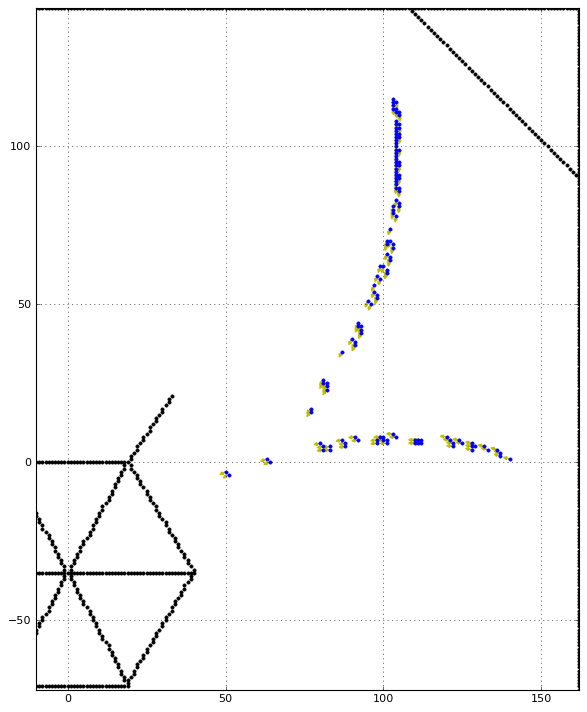

In [77]:
#  Prints stage1 paths having a specified radius
rr=120
ne_stage1=mp.load_config('ne_stage1.pickle')
ssrr=dict([(k,v) for k,v in ne_stage1.iteritems() if v.r()==rr])
print len(ssrr)
mp.flow_plot_config(ssrr, xlim=(-10,mp.UPPER_XLIMIT), ylim=(-72,mp.UPPER_YLIMIT), 
                    arrowsize=1, arrowlength=1, max=300, figsize=11,verbose=True, verbosemax=5)

In [32]:
#=======================================
# Load stage1 configuration file
#=======================================
mp = reload(mp)
config = mp.load_config(mp.NE_STAGE1_FILEPATH)
print len(config)
#=======================================
# Load stage2 configuration sample
#=======================================
config2 = mp.load_config(mp.NE_STAGE2_FILEPATH)
# config2 = mp.load_config("sample_stage2.pickle")
print len(config2)
#=======================================
# Load overall configuration sample
#=======================================
#config3 = mp.load_config("ne_sample.pickle")


07:44:01 INFO:Loading config file from ne_stage1.pickle
07:44:04 INFO:Loading config file from ne_stage2.pickle


213196
462771


In [80]:
#
# FOLLOWING SHOULD BE ZERO : no stage2 states should have a dist2 value
#
assert(len([(k,v) for k,v in config2.iteritems() if v.goal2() and not v.dist2()])==0)


In [81]:
#
# Selects a small set of states falling within a distance range.
#
d_min = 20
d_max = 20.5
c_filtered = dict([(k,v) for k,v in config2.iteritems() if d_min <= v.dist() <= d_max])
print "Number of cells having %.1f <= dist <= %.1f : %d " % (d_min,d_max,len(c_filtered))
max=7
ii=0
for k,v in c_filtered.items():
    if ii<max:
        mp.print_state(k,v)
        ii+=1

Number of cells having 20.0 <= dist <= 20.5 : 181 
   (2, 40, 350) : g1:     (0, 20, 0)  r: 116.0  type: lh  d: 20.0   g2:           None  d2:  None  samples: 75
  (13, 35, 286) : g1:     (1, 20, 0)  r:  16.5  type: lh  d: 20.5   g2:           None  d2:  None  samples: 1
   (7, 39, 330) : g1:   (1, 20, 354)  r:  48.5  type: lh  d: 20.1   g2:           None  d2:  None  samples: 23
   (6, 38, 308) : g1:   (-1, 20, 10)  r:  19.0  type: lh  d: 20.2   g2:           None  d2:  None  samples: 6
   (3, 40, 350) : g1:     (1, 20, 0)  r: 240.0  type: lh  d: 20.1   g2:           None  d2:  None  samples: 41
   (2, 40, 334) : g1:    (0, 20, 10)  r:  33.0  type: lh  d: 20.4   g2:           None  d2:  None  samples: 19
   (4, 40, 334) : g1:     (0, 20, 0)  r:  36.5  type: lh  d: 20.5   g2:           None  d2:  None  samples: 27


Plotted 100/100 


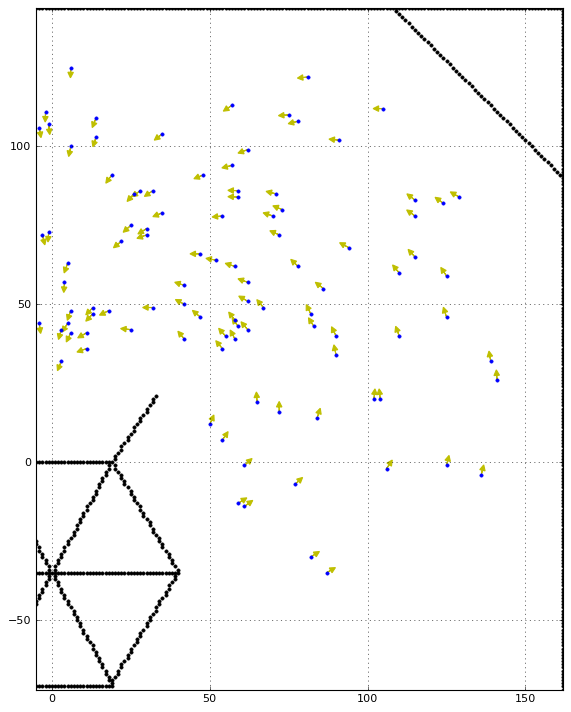

In [82]:
#  Plots a sample of first stage paths
mp=reload(mp)
fdl_config = dict([(k,v) for k,v in config.iteritems()][:100])
mp.flow_plot_config(fdl_config,xlim=(mp.LOWER_XLIMIT,mp.UPPER_XLIMIT),
                    ylim=(mp.NE_LOWER_YLIMIT,mp.UPPER_YLIMIT),
                    arrowsize=1.75, arrowlength=1.5, max=200,figsize=11)

In [83]:
config = mp.load_config(mp.N_STAGE1_FILEPATH)
config = mp.load_config(mp.NE_STAGE1_FILEPATH)
print len(config)


04:02:35 INFO:Loading pickle file : n_stage1.pickle


110930


Plotted 0/0 


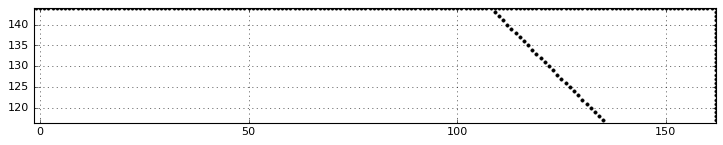

Count: 0


In [85]:
# Points that are within half robot width from the north wall:
# This should be empty, indicating that collision avoidance is working properly 
close_to_wall = dict([(k,v) for k,v in config.iteritems() if (mp.UPPER_YLIMIT-k[1])<mp.ROBOT_WIDTH/2][:100])
mp.flow_plot_config(close_to_wall,xlim=(-1.5,mp.UPPER_XLIMIT),
                    ylim=(mp.UPPER_YLIMIT-mp.ROBOT_WIDTH,mp.UPPER_YLIMIT),
                    arrowsize=1.75, arrowlength=1.5, max=50,figsize=11,
                    verbose=True,verbosemax=10)
print "Count: %d" % len(close_to_wall)

Plotted 0/0 


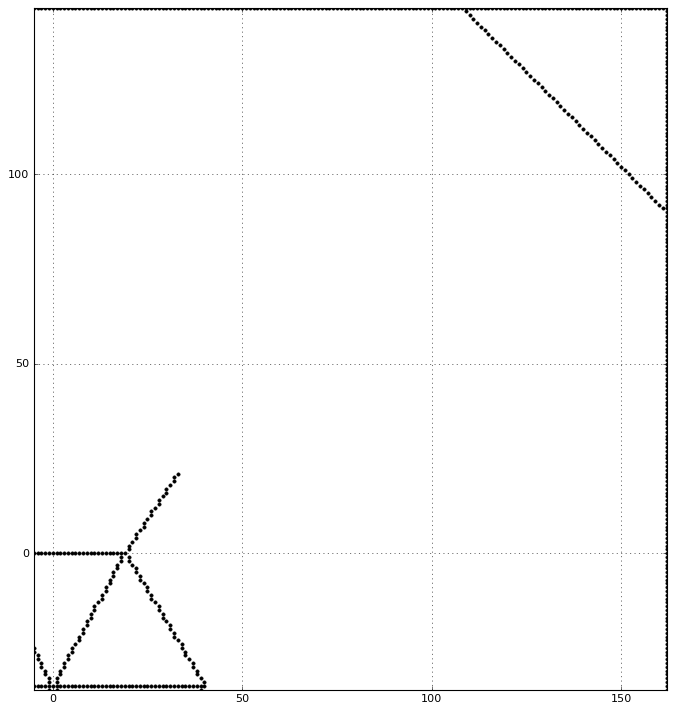

Count: 0


In [88]:
#
# Draws points that are within half robot width from the east wall:
#
# Should be empty. 
#
close_to_wall = dict([(k,v) for k,v in config.iteritems() if (mp.UPPER_XLIMIT-k[0])<mp.ROBOT_WIDTH/2][:100])
mp.flow_plot_config(close_to_wall,xlim=(-5,mp.UPPER_XLIMIT),
                    ylim=(-36,mp.UPPER_YLIMIT),
                    arrowsize=1.75, arrowlength=1.5, max=50,figsize=11,
                    verbose=True,verbosemax=10)
print "Count: %d" % len(close_to_wall)

(89, 119, 282):StateP(goal1=(0, 20, 354),dist=141.33,type=lh,r=114.0,goal2=None,dist2=None,rot=None,samples=5
(20, 122, 344):StateP(goal1=(1, 20, 354),dist=103.88,type=lh,r=600.0,goal2=None,dist2=None,rot=None,samples=3
(94, 122, 276):StateP(goal1=(0, 20, 0),dist=151.26,type=lh,r=103.0,goal2=None,dist2=None,rot=None,samples=5
(57, 113, 304):StateP(goal1=(0, 20, 354),dist=111.98,type=lh,r=130.0,goal2=None,dist2=None,rot=None,samples=13
(1, 120, 358):StateP(goal1=(-1, 20, 0),dist=100.0,type=lh,r=3000.0,goal2=None,dist2=None,rot=None,samples=48
Plotted 101/200 


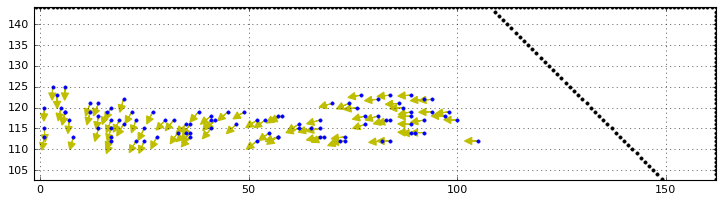

In [89]:
# Points that are within full robot width from the north wall.
# These are properly far enough from the wall to avoid collision
# and properly cover that space as desired.
close_to_wall = dict([(k,v) for k,v in config.iteritems() if (abs(mp.UPPER_YLIMIT-k[1]) < 1.2*mp.ROBOT_WIDTH)][:200])
mp.flow_plot_config(close_to_wall,xlim=(-1.5,mp.UPPER_XLIMIT),
                    ylim=(mp.UPPER_YLIMIT-1.5*mp.ROBOT_WIDTH,mp.UPPER_YLIMIT),
                    arrowsize=1.75, arrowlength=1.5, max=100,figsize=11,
                    verbose=True,verbosemax=5)

# Check collisions


In [104]:
ls

arcs.ipynb                     ne_sample_traj.pickle
evaluate.ipynb                 ne_sample_unreachables.pickle
field_drawings.ipynb           ne_stage1.pickle
load_mp.py                     ne_stage2.pickle
mem_profiling.py               ne_stage3.pickle
motion_planner.py              ne_stage4.pickle
motion_planner.pyc             ne_unreachables.pickle
mp_deprecated.ipynb            oldcode/
n_remaining.pickle             readme.md
n_sample.pickle                requirements.txt
n_sample_stage2.pickle         results.txt
n_sample_stage4.pickle         runs/
n_sample_traj.pickle           sample.pickle
n_sample_unreachables.pickle   sample_stage2.pickle
n_stage1.pickle                sample_stage4.pickle
n_stage2.pickle                sample_traj.pickle
n_stage3.pickle                sample_trajectories.ipynb
n_stage4.pickle                spacefilling_circles.ipynb
n_unreachables.pickle          stage1.pickle
ne_remaining.pickle            stage2.pickle
ne_sample.pickle           

04:42:01 INFO:Loading pickle file : ne_sample_stage2.pickle


28.5 27.5
4
Plotted 4/4 


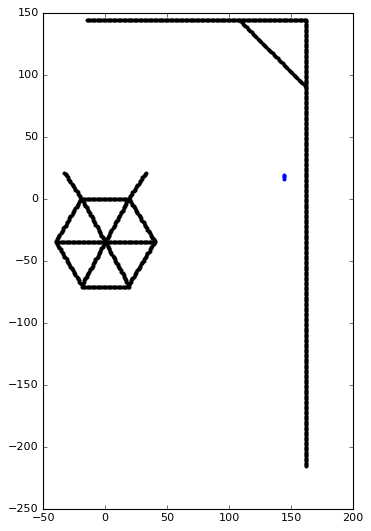

In [155]:
#
#   Should be nearly empty 
#
# config = mp.load_config(mp.NE_STAGE1_FILEPATH)
# cc=config

# Can take a minute for full stage2, better to use a sample
# config2 = mp.load_config('n_sample_stage2.pickle')
config2 = mp.load_config('ne_sample_stage2.pickle')
cc=config2

collisions=set()
print mp.ROBOT_LENGTH, mp.ROBOT_WIDTH
tol = mp.ROBOT_LENGTH/2
for k,v in cc.iteritems():
    if abs(k[0]-mp.UPPER_XLIMIT) < tol+4:  # <== note added buffer
        collisions.add((k[0],k[1]))
    if abs(k[1]-mp.UPPER_YLIMIT) < tol+5:  # <==
        collisions.add((k[0],k[1]))

print len(collisions)
mp.plot_xy(collisions, max=300)

In [202]:
#  SHOULD GENERATE 0 COLLISIONS
mp = reload(mp)
start = time.time()
print "Size obstacles: %d   elapsed: %.3f sec" % (len(mp.xy_obstacles_set()), (time.time()-start)) 
collisions = mp.check_collisions(config.iterkeys())
print "Collisions: %d/%d  (%.3f)    elapsed: %.1f min)" % \
            (len(collisions), len(config), float(len(collisions))/len(config), (time.time()-start)/60.0)



Size obstacles: 1066   elapsed: 0.001 sec
Collisions: 0/110930  (0.000)    elapsed: 0.4 min)


In [203]:
#  SHOULD BE EMPTY
cconfig = dict([(k,{}) for k in collisions])
if cconfig:
    mp.flow_plot_config(cconfig,xlim=(-1.5,mp.UPPER_XLIMIT),
                    ylim=(mp.NE_LOWER_YLIMIT,mp.UPPER_YLIMIT),
                    arrowsize=1.75, arrowlength=1.5, max=500,figsize=9)

In [93]:
mp = reload(mp)
mp.check_collisions_config(config)

09:18:00 INFO:Checking collisions
09:18:44 WARNING:Collisions: 1460/172959  (0.008)    elapsed: 0.7 min)


In [94]:
mp.check_collisions_config(config2)

09:18:44 INFO:Checking collisions
09:19:46 WARNING:Collisions: 4561/247826  (0.018)    elapsed: 1.0 min)


In [182]:
mp.check_collisions_config(config3)

03:45:26 INFO:Checking collisions
03:45:29 WARNING:Collisions: 1127/17316  (0.065)    elapsed: 0.1 min)


In [184]:
configg1 = mp.load_config(mp.N_STAGE1_FILEPATH)
mp.check_collisions_config(configg1)

03:54:21 INFO:Loading config file from stage1.pickle
03:54:21 INFO:Checking collisions
03:54:21 INFO:No collisions


In [185]:
configg2 = mp.load_config(mp.N_STAGE2_FILEPATH)
mp.check_collisions_config(configg2)

03:58:19 INFO:Loading config file from stage2.pickle
03:58:19 INFO:Checking collisions
03:58:23 INFO:No collisions


In [213]:
unreachables = mp.load_config('ne_sample_unreachables.pickle')

05:31:57 INFO:Loading pickle file : ne_sample_unreachables.pickle


Plotted 501/11519 


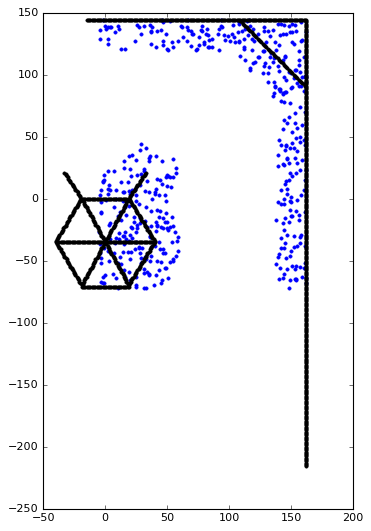

In [217]:
# This draws the xy locations for which there is at least one heading which results in an unreachable state.
# The upper wall right wall, and airship are bordered with many unreachable states, as expected. 
mp.plot_unreachables_xy(unreachables, max=500)

11 : (17,-22,128) 
x,y,t: (17,-22,128) 
Plotted 1001/1256 


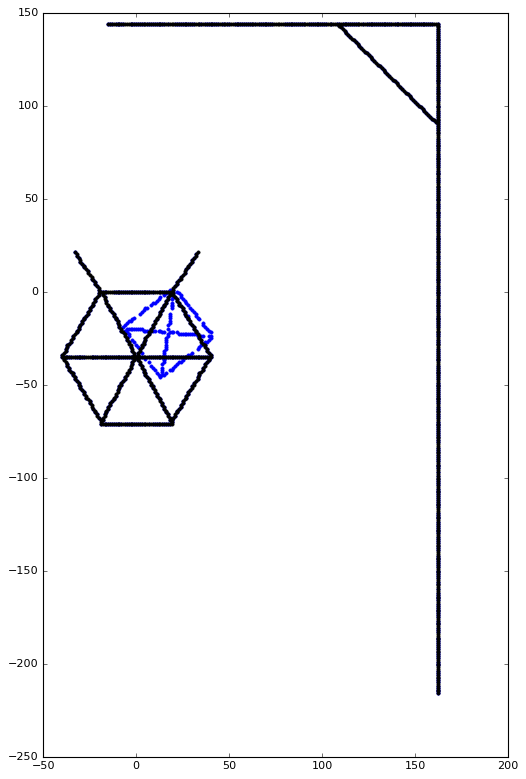

			===   COLLIDES   ===


In [218]:
which=11
ii=0
for x,y,h in unreachables:
    if ii==which:
        print ii,": (%d,%d,%d) "% (x,y,h)
        mp.plot_check_collision((x,y),h,degrees=True)
        break
    ii+=1

In [ ]:
del unreachables

# Quantitative evaluations
## Compares stage 1 path distance with actual circular arc length



In [132]:
config = mp.load_config(mp.N_STAGE1_FILEPATH)
#config = mp.load_config(mp.NE_STAGE1_FILEPATH)
print "Num rows: ", len(config)


04:26:34 INFO:Loading pickle file : n_stage1.pickle


In [133]:
max=10
ii=0
for k,v in config.iteritems():
    ii+=1
    print k,v
    if ii>max:
        break

(54, 78, 276) StateP(goal1=(1, 20, 0),dist=85.97,type=lh,r=59.0,goal2=None,dist2=None,rot=None,samples=5
(125, 59, 214) StateP(goal1=(0, 20, 0),dist=172.44,type=lh,r=69.0,goal2=None,dist2=None,rot=None,samples=6
(13, 47, 316) StateP(goal1=(0, 20, 354),dist=30.07,type=lh,r=46.0,goal2=None,dist2=None,rot=None,samples=12
(57, 113, 304) StateP(goal1=(0, 20, 354),dist=111.98,type=lh,r=130.0,goal2=None,dist2=None,rot=None,samples=13
(6, 48, 340) StateP(goal1=(1, 20, 0),dist=28.57,type=lh,r=84.5,goal2=None,dist2=None,rot=None,samples=77
(22, 70, 310) StateP(goal1=(-1, 20, 0),dist=56.77,type=lh,r=66.0,goal2=None,dist2=None,rot=None,samples=8
(59, 43, 216) StateP(goal1=(0, 20, 6),dist=84.81,type=lh,r=33.0,goal2=None,dist2=None,rot=None,samples=4
(62, 57, 250) StateP(goal1=(1, 20, 354),dist=81.99,type=lh,r=45.5,goal2=None,dist2=None,rot=None,samples=3
(52, 64, 260) StateP(goal1=(0, 20, 0),dist=77.26,type=lh,r=45.0,goal2=None,dist2=None,rot=None,samples=8
(-1, 107, 6) StateP(goal1=(-1, 20, 354),d

In [141]:
def eval_stage1(config, keys=None, max=20, step=0):
    """
    Prints states where arc_dist 
    """
    tol=1.0
    if not keys:
        keys = config.keys()
    for k in keys[step*max:(step+1)*max]:
        v = config[k]
        if v.dist2():
            print "%15s :  ERROR. Found dist2 field in stage1 plan" % k
        distuple = mp.arc_dist((k[0],k[1]),(v.goal1()[0],v.goal1()[1]),v.r(),h=np.radians(k[2]),turntype=v.type())
        sumdist = sum(distuple) if distuple != (None,None) else -1
        error = -1.0 if sumdist<0 else abs(v.dist()-sumdist)
        distr = (-1,-1) if distuple == (None,None) else distuple
        diff = " diff: %3.1f" % error if error > tol else ''
        print "%15s : r:%.1f  dist: %6.1f  actual: %6.1f  tup: (%5.1f, %5.1f)  goal1: %8s   %s" % \
                (k, v.r(), v.dist(), sumdist, distr[0], distr[1], v.goal1(), diff)


def eval2_stage1(config, mintol=0.5,maxtol=10,error_tol=25):
    """
    Evaluates stage1 paths using the cw_arclength measure that is used by the stage 1 planner
    to fill the 'dist' field in the table. 

    The stored dist value can differ from the recalculated distance due to discretization,
    although we expect that this will be small on average.

    Checks performed: 
    - recalculated path distance for (x,y,h) agrees with the distance stored in the table
    - the path destination is nearby the intended goal.
    """
    print "Min tol: %.2f   Max tol: %.2f   Error tol: %.2f" % (mintol, maxtol, error_tol)
    start_time = time.time()
    maxprint = 5
    tol=1.0
    useable=0
    discrepant=0
    divergent=0
    missing=0
    logged=0
    for k in config.iterkeys():
        v = config[k]
        if v.dist2():
            print "%15s :  ERROR. Found dist2 field in stage1 plan" % k
        error = -1
        if v.dist() and v.goal1():
            (gx,gy,gh) = v.goal1()
            cw_arcl = mp.cw_arclength((gx,gy), (k[0], k[1],), v.r(), tol=0.75)
            error = abs(cw_arcl-v.dist()) if cw_arcl else -1
            if logged < maxprint:
                print "error: %.1f" % error
                logged += 1
        if error < 0:
            missing += 1
        if 0 <= error < mintol:
            useable += 1
        if error > maxtol:
            discrepant += 1
        if error > error_tol:
            distuple = mp.arc_dist((k[0],k[1]),(0,0),v.r(),h=np.radians(k[2]),turntype=v.type(),tol=100)
            sumdist = sum(distuple) if distuple != (None,None) else -1
            divergent += 1
            diff = " diff: %3.1f" % error if error > tol else ''
            distr = (-1,-1) if distuple == (None,None) else distuple
            print "%15s : r:%.1f  dist: %6.1f  actual: %6.1f  tup: (%5.1f, %5.1f)  goal1: %8s   %s" % \
                    (k, v.r(), v.dist(), sumdist, distr[0], distr[1], v.goal1(), diff)

    print "Number of states :       %6d" % len(config)
    print "       missing   :       %6d" % missing
    print "       divergent :       %6d  (exceed error tol)" % divergent
    print "       discrepant:       %6d  (exceed max tol)" % discrepant
    print "            exact:       %6d  (within min tol)" % useable
    print "Elapsed:  %d seconds " % (time.time()-start_time)

    

In [142]:
eval_stage1(config)

  (54, 78, 276) : r:59.0  dist:   86.0  actual:   86.0  tup: ( 85.8,   0.2)  goal1: (1, 20, 0)   
 (125, 59, 214) : r:69.0  dist:  172.4  actual:  175.0  tup: (176.2,  -1.2)  goal1: (0, 20, 0)    diff: 2.6
  (13, 47, 316) : r:46.0  dist:   30.1  actual:   30.8  tup: ( 30.4,   0.4)  goal1: (0, 20, 354)   
 (57, 113, 304) : r:130.0  dist:  112.0  actual:  112.8  tup: (112.3,   0.5)  goal1: (0, 20, 354)   
   (6, 48, 340) : r:84.5  dist:   28.6  actual:   28.5  tup: ( 28.6,  -0.1)  goal1: (1, 20, 0)   
  (22, 70, 310) : r:66.0  dist:   56.8  actual:   56.5  tup: ( 57.0,  -0.6)  goal1: (-1, 20, 0)   
  (59, 43, 216) : r:33.0  dist:   84.8  actual:   86.1  tup: ( 86.6,  -0.5)  goal1: (0, 20, 6)    diff: 1.3
  (62, 57, 250) : r:45.5  dist:   82.0  actual:   81.9  tup: ( 81.6,   0.3)  goal1: (1, 20, 354)   
  (52, 64, 260) : r:45.0  dist:   77.3  actual:   77.4  tup: ( 78.2,  -0.8)  goal1: (0, 20, 0)   
   (-1, 107, 6) : r:420.0  dist:   87.2  actual:   87.1  tup: ( 87.2,  -0.1)  goal1: (-1, 

In [151]:
kk = sorted([k for k,v in config.iteritems() if v.dist()>71.5 and v.goal1() == (0.0, 0.0)])
eval_stage1(config, kk, max=10, step=7)


   (3, 42, 344) : r:83.5  dist:   22.1  actual:   22.1  tup: ( 22.3,  -0.2)  goal1: (0, 20, 0)   
 (104, 20, 186) : r:52.0  dist:  148.9  actual:  153.1  tup: (152.5,   0.6)  goal1: (0, 20, 354)    diff: 4.2
  (11, 36, 290) : r:15.0  dist:   20.4  actual:   21.3  tup: ( 20.1,   1.2)  goal1: (0, 20, 0)   
 (115, 65, 222) : r:66.5  dist:  158.3  actual:  159.8  tup: (160.7,  -0.9)  goal1: (0, 20, 0)    diff: 1.5
  (13, 49, 316) : r:43.0  dist:   32.1  actual:   33.1  tup: ( 32.2,   0.9)  goal1: (0, 20, 354)   
  (32, 86, 304) : r:71.5  dist:   76.5  actual:   77.3  tup: ( 76.5,   0.8)  goal1: (0, 20, 6)   
  (6, 125, 358) : r:1300.0  dist:  105.2  actual:  107.0  tup: (105.1,   1.9)  goal1: (0, 20, 354)    diff: 1.8
   (5, 63, 340) : r:99.5  dist:   43.6  actual:   43.2  tup: ( 43.8,  -0.6)  goal1: (0, 20, 6)   
  (26, 85, 318) : r:98.5  dist:   71.2  actual:   72.0  tup: ( 71.3,   0.7)  goal1: (0, 20, 0)   
  (61, -1, 132) : r:37.5  dist:   77.7  actual:  155.4  tup: (156.3,  -0.9)  goa

In [143]:
eval2_stage1(config,mintol=2.1, error_tol=18)

Min tol: 2.10   Max tol: 10.00   Error tol: 18.00
error: 0.0
error: 0.0
error: 0.5
error: 0.6
error: 0.0
Number of states :       110930
       missing   :          206
       divergent :            0  (exceed error tol)
       discrepant:         4173  (exceed max tol)
            exact:        91793  (within min tol)
Elapsed:  1 seconds 


In [149]:
def eval3_stage1(config, mintol=2.0,maxtol=10,error_tol=100,al_tol=50,max=100):
    """
    Evaluates stage1 paths using a different criterion than eval2_stage1,
    comparing the stored 'dist' value with an arc length calculated using the arc_dist method.

    The arc_dist method is not necessarily more correct; it is more accurate in certain cases, 
    but can be fooled into measuring the wrong arc path resulting in large disrepancies for certain edge cases.
    """
    start_time = time.time()
    print "Min tol: %.2f   Max tol: %.2f   Error tol: %.2f" % (mintol, maxtol, error_tol)
    maxprint = 5
    tol=1.0
    useable=0
    discrepant=0
    divergent=0
    missing=0
    logged=0
    ii=0
    for k in config.iterkeys():
        v = config[k]
        if v.dist2():
            print "%15s :  ERROR. Found dist2 field in stage1 plan" % k
        distuple = mp.arc_dist((k[0],k[1]),(0,0),v.r(),h=np.radians(k[2]),turntype=v.type(),tol=al_tol)
        sumdist = sum(distuple) if distuple != (None,None) else -1
        error = -1.0 if sumdist<0 else abs(v.dist()-sumdist)
        error = (abs(sumdist-v.dist())) if sumdist>=0 else -1
        if logged < maxprint:
            print "error: %.1f" % error
            logged += 1
        if error < 0:
            missing += 1
        if 0 <= error < mintol:
            useable += 1
        elif error > maxtol:
            discrepant += 1
        elif error > error_tol:
            divergent += 1
            diff = "diff: %3.1f" % error if error > tol else ''
            distr = (-1,-1) if distuple == (None,None) else distuple
            if ii<max:
                print "%15s : r:%6.1f  dist:%6.1f arc_dist: %7.1f  tup: (%7.1f, %5.1f)  goal1: %12s   %s" % \
                    (k, v.r(), v.dist(), sumdist, distr[0], distr[1], v.goal1(), diff)
                ii+=1


    print "Number of states :       %6d" % len(config)
    print "       missing   :       %6d" % missing
    print "       divergent :       %6d\t(error > %.1f)" % (divergent, error_tol)
    print "          useable:       %6d\t(error < %.1f)" % (discrepant, maxtol)
    print "         accurate:       %6d\t(error < %.1f)" % (useable, mintol)
    print "Elapsed:  %d seconds " % (time.time()-start_time)



In [150]:
eval3_stage1(config,mintol=3,maxtol=10,error_tol=50,max=15)

Min tol: 3.00   Max tol: 10.00   Error tol: 50.00
error: 23.1
error: 25.4
error: 22.3
error: 20.1
error: 22.5
Number of states :       110930
       missing   :            0
       divergent :            0	(error > 50.0)
          useable:       110930	(error < 10.0)
         accurate:            0	(error < 3.0)
Elapsed:  5 seconds 


# Visualize stage 1 paths

5466
Plotted 201/5466 


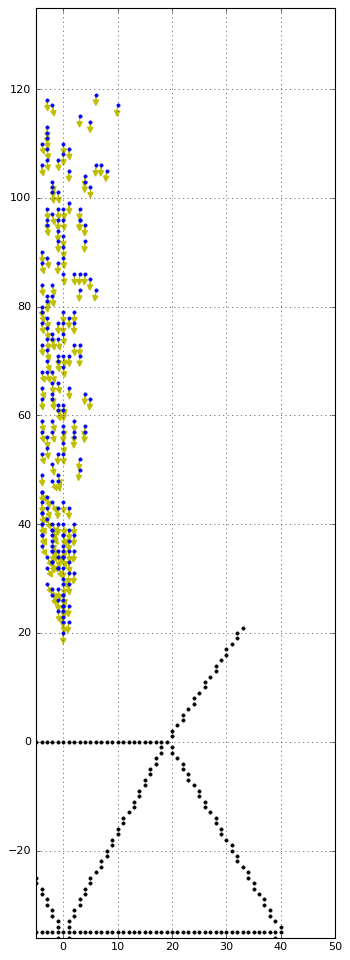

In [152]:
dmin=0
dmax=100
rh = dict([(k,v) for k, v in config.iteritems() if v.type() == 'rh' and dmin<v.dist()<dmax])
print len(rh)
#mp.flow_plot_config(rh,xlim=(-1.5,20),ylim=(-0.5,70),arrowsize=1, arrowlength=1, max=10)
mp.flow_plot_config(rh,xlim=(-5,50),ylim=(-36,135),arrowsize=1, arrowlength=1, max=200, figsize=15)

04:39:06 INFO:Loading pickle file : n_stage1.pickle
04:39:08 INFO:Loading pickle file : n_sample_stage2.pickle


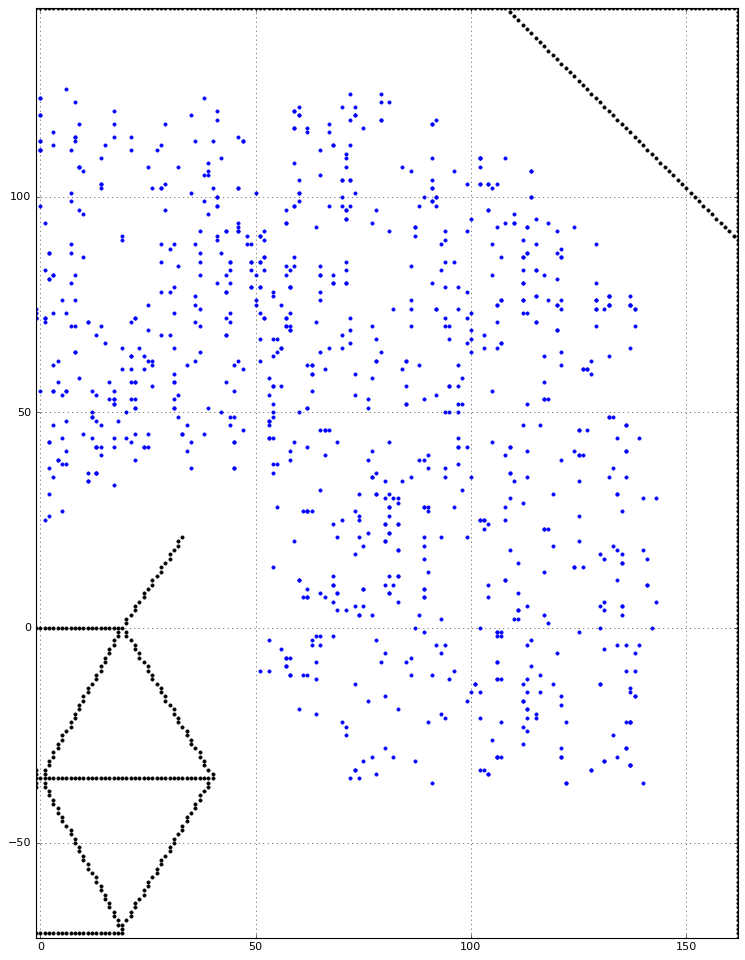

04:39:13 INFO:Plotted 1001/177120 states


In [153]:
#mp=reload(mp)
config = mp.load_config("n_stage1.pickle")
config2 = mp.load_config("n_sample_stage2.pickle")
mp.state_scatterplot(config2,minx=-1,maxx=mp.UPPER_XLIMIT,miny=-72,maxy=mp.UPPER_YLIMIT,max=1000,verbose=False)

04:39:38 INFO:Loading pickle file : n_stage1.pickle
04:39:40 INFO:Loading pickle file : ne_stage1.pickle


Plotted 100/100 


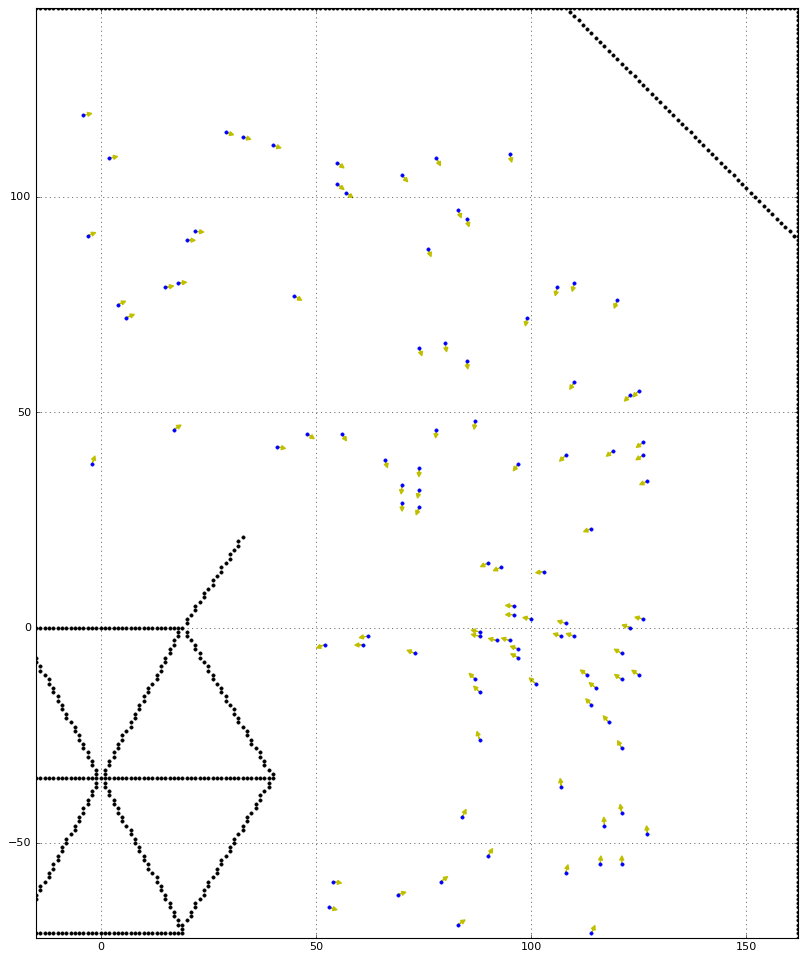

In [154]:
config = mp.load_config("n_stage1.pickle")
config = mp.load_config("ne_stage1.pickle")
ccr = dict([(k,v) for k,v in config.iteritems() if v.type()=='rh'][:50])
ccl = dict([(k,v) for k,v in config.iteritems() if v.type()=='lh'][:50])
ccl.update(ccr)
mp.flow_plot_config(ccl,xlim=(-15,mp.UPPER_XLIMIT),ylim=(-72,mp.UPPER_YLIMIT),arrowsize=1, arrowlength=1, max=200,figsize=15)

In [156]:
#
# Selects subset of stage 1 states falling within a dist range
#
d_min = 20
d_max = 30
c_1_40 = dict([(k,v) for k,v in config.iteritems() if not v.goal2() and v.dist() and d_min <= v.dist() <= d_max])
print "\nNum of STAGE 1 cells having %.2f <= dist <= %.2f : %d " % (d_min,d_max,len(c_1_40))
ii=0
for k,v in c_1_40.items():
    mp.print_state(k,v)
    ii+=1
    if ii>15:
        break



Num of STAGE 1 cells having 20.00 <= dist <= 30.00 : 2233 
   (62, 8, 336) : g1:  (46, -8, 294)  r:  32.0  type: rh  d: 23.1   g2:           None  d2:  None  samples: 9
   (66, 8, 320) : g1:  (46, -8, 300)  r:  75.0  type: rh  d: 25.7   g2:           None  d2:  None  samples: 54
  (66, -1, 268) : g1:  (45, -7, 300)  r:  40.5  type: lh  d: 22.1   g2:           None  d2:  None  samples: 17
   (61, 6, 334) : g1:  (46, -8, 294)  r:  30.5  type: rh  d: 20.9   g2:           None  d2:  None  samples: 2
  (66, -1, 274) : g1:  (46, -8, 300)  r:  47.5  type: lh  d: 21.4   g2:           None  d2:  None  samples: 22
  (65, 14, 336) : g1:  (46, -8, 300)  r:  48.5  type: rh  d: 29.5   g2:           None  d2:  None  samples: 11
  (73, -6, 248) : g1:  (46, -8, 300)  r:  31.5  type: lh  d: 28.0   g2:           None  d2:  None  samples: 5
  (67, 11, 328) : g1:  (46, -8, 294)  r:  50.0  type: rh  d: 28.7   g2:           None  d2:  None  samples: 27
  (60, 14, 350) : g1:  (45, -7, 300)  r:  31.0  type: r

# Where are the remaining unexplored states?
 

04:32:48 INFO:Loading pickle file : n_remaining.pickle


Plotted 201/11328 


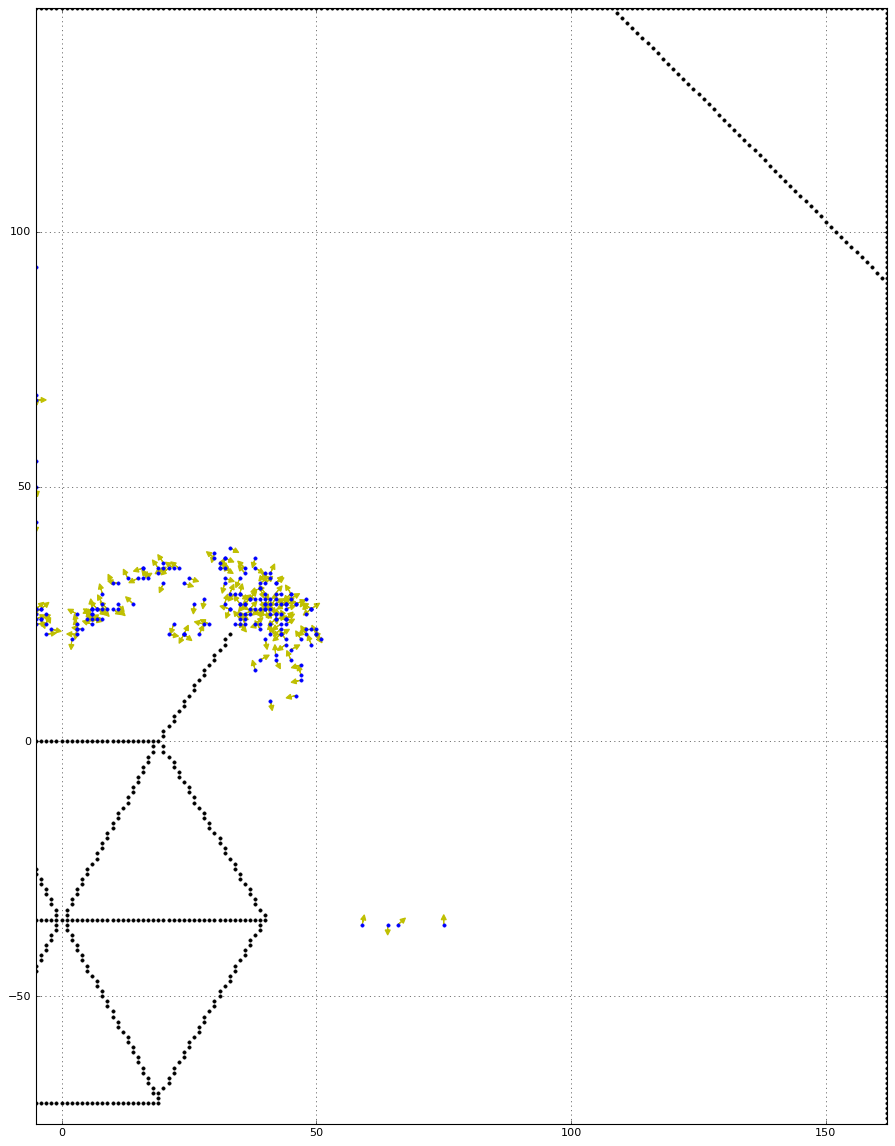

In [5]:
rem = mp.load_config('n_remaining.pickle')
mp.flow_plot_xyt(rem, max=200, xlim=(-5,mp.UPPER_XLIMIT), ylim=(-75,mp.UPPER_YLIMIT),
                 arrowsize=1, arrowlength=1, figsize=18, verbose=False)

04:32:56 INFO:Loading pickle file : ne_remaining.pickle


Plotted 201/15138 


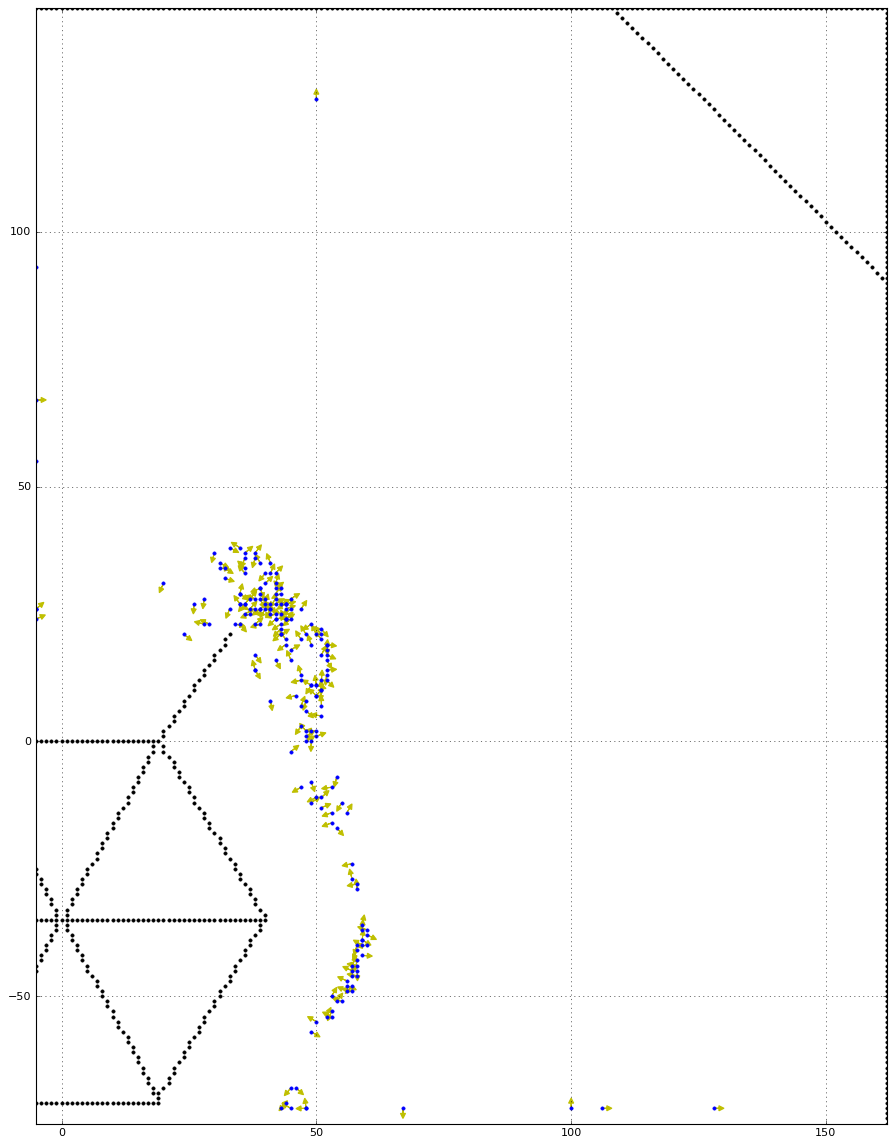

In [6]:
rem = mp.load_config('ne_remaining.pickle')
mp.flow_plot_xyt(rem, max=200, xlim=(-5,mp.UPPER_XLIMIT), ylim=(-75,mp.UPPER_YLIMIT),
                 arrowsize=1, arrowlength=1, figsize=18, verbose=False)

# Trajectory data analysis
Examines state trajectory data.

If you wish to also display the simulated graphical path for each leg of the trajectory, use path_plot_xyt() instead

In [21]:
trajs = mp.load_config('n_sample_traj.pickle')
print next(trajs.iterkeys())
print next(trajs.itervalues())
print
#   Sample
print "Sample:\n"
max=11
ii=0
for k,v in config.iteritems():
    if ii>max:
        break
    mp.print_state(k,v)
    ii+=1


02:38:38 INFO:Loading pickle file : n_sample_traj.pickle


(18, 87, 218)
[((18, 87, 354), (18, 87, 138), (1, 20, 354), 'qt', 0.1, None), ((17, 83, 338), (21, 89, 122), (1, 20, 354), 'rh', 4.13, 15.0), ((1, 20, 354), (70, 130, 138), (1, 20, 354), 'lh', 65.2, 230.0)]

Sample:

  (54, 78, 276) : g1:     (1, 20, 0)  r:  59.0  type: lh  d: 86.0   g2:           None  d2:  None  samples: 5
 (125, 59, 214) : g1:     (0, 20, 0)  r:  69.0  type: lh  d:172.4   g2:           None  d2:  None  samples: 6
  (13, 47, 316) : g1:   (0, 20, 354)  r:  46.0  type: lh  d: 30.1   g2:           None  d2:  None  samples: 12
 (57, 113, 304) : g1:   (0, 20, 354)  r: 130.0  type: lh  d:112.0   g2:           None  d2:  None  samples: 13
   (6, 48, 340) : g1:     (1, 20, 0)  r:  84.5  type: lh  d: 28.6   g2:           None  d2:  None  samples: 77
  (22, 70, 310) : g1:    (-1, 20, 0)  r:  66.0  type: lh  d: 56.8   g2:           None  d2:  None  samples: 8
  (59, 43, 216) : g1:     (0, 20, 6)  r:  33.0  type: lh  d: 84.8   g2:           None  d2:  None  samples: 4
  (62, 57,

In [363]:
#trajs = mp.load_config('n_sample_traj.pickle')
trajs = mp.load_config('ne_sample_traj.pickle')
print "Number of trajectories loaded: ", len(trajs)

07:09:28 INFO:Loading pickle file : ne_sample_traj.pickle


Number of trajectories loaded:  20000


Number of trajectories length 4:  78
Key #4:    (140, -36, 16)
(140, -36, 16)  ==>
	
	((112, 58, 16), (112, 58, 16), (0, 20, 354), '|', -98.08, None)
	((112, 58, 314), (112, 58, 116), (0, 20, 354), 'qt', 0.1, None)
	((92, 57, 230), (131, 52, 32), (0, 20, 354), 'rh', 21.92, 15.0)
	((0, 20, 354), (229, 56, 152), (0, 20, 354), 'lh', 119.08, 56.5)

Waypoints: [(140, -36, 16), (112, 58, 16), (112, 58, 314), (92, 57, 230), (0, 20, 354)]

Trajectory:
{(140, -36, 16): [((112, 58, 16), (112, 58, 16), (0, 20, 354), '|', -98.08, None), ((112, 58, 314), (112, 58, 116), (0, 20, 354), 'qt', 0.1, None), ((92, 57, 230), (131, 52, 32), (0, 20, 354), 'rh', 21.92, 15.0), ((0, 20, 354), (229, 56, 152), (0, 20, 354), 'lh', 119.08, 56.5)]}


State :  (140, -36, 16)
State :  (112, 58, 16)
State :  (112, 58, 314)
State :  (92, 57, 230)
State :  (0, 20, 354)
Plotted 5/5 


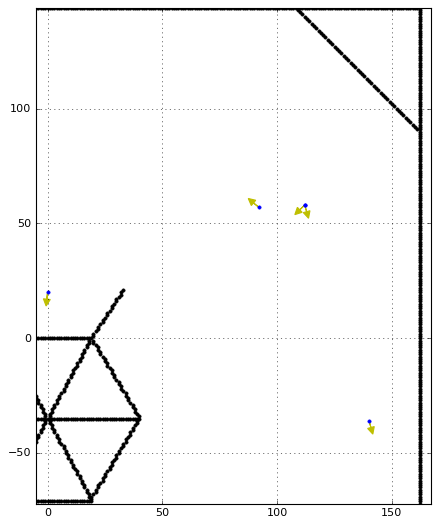

In [24]:
#    For the paths belonging to a selected trajectory, 
#    - draws the waypoints 
#    - prints the trajectory data.
#
#   Does NOT draw the connecting paths, only the (x,y,h) location + heading.
#   (To display the simulated graphical path for each leg of the trajectory, see path_plot_xyt)

which = 4
k4s = [k for k in trajs if len(trajs[k])==4]
print "Number of trajectories length 4: ", len(k4s)
key = k4s[which]
print "Key #%d:   " % which, key
trajectories = dict([(k,v) for k,v in trajs.iteritems() if k==key])
print key," ==>\n\t"
print "\t","\n\t".join([str(x) for x in trajectories[key]])
waypoints = [key] + [x[0] for x in trajectories[key]]
print "\nWaypoints:",waypoints
trajectory = [key] + trajectories[key]
print "\nTrajectory:"
print trajectories
print
print
xlim,ylim=mp.UPPER_XLIMIT,mp.UPPER_YLIMIT
#xlim,ylim=25,40
mp.flow_plot_xyt(waypoints, xlim=(-5,xlim+5), ylim=(-72,ylim), 
                 max=50, arrowsize=3, arrowlength=3, figsize=8, verbose=True)

12:05:03 INFO:Loading pickle file from ne_sample.pickle
12:05:03 INFO:Loading pickle file from ne_sample_unreachables.pickle
12:05:11 INFO:Number of bins: 36456 
12:05:11 INFO:max reached


plotted 10001


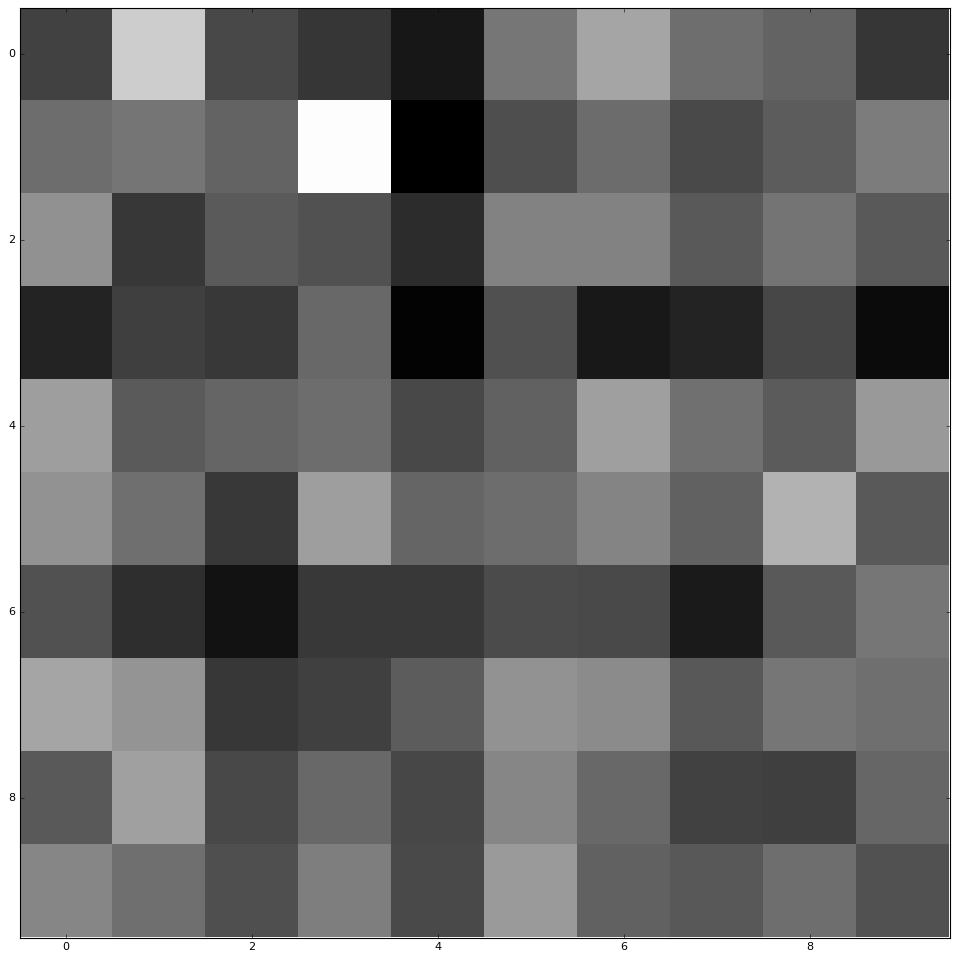

In [251]:
mp = reload(mp)
configsample = mp.load_config('ne_sample.pickle')
unreachables = mp.load_config('ne_sample_unreachables.pickle')
mp.binplot_unexplored('northeast', configsample, unreachables, max=10000)